In [34]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [9]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
def plot_sample(X,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

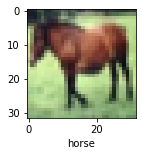

In [20]:
plot_sample(X_train,y_train,7)

In [23]:
X_train = X_train / 255
X_test = X_test / 255

In [26]:
cnn = models.Sequential([
 
    layers.Conv2D(filters = 32,kernel_size = (3,3) , activation = 'relu' , input_shape = (32,32,3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(filters = 64,kernel_size = (3,3) , activation = 'relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
    
])

In [27]:
cnn.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

In [28]:
cnn.fit(X_train,y_train,epochs = 10)

2022-05-07 12:45:44.108694: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.5225 - accuracy: 0.4521
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1608 - accuracy: 0.5911
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0228 - accuracy: 0.6430
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9285 - accuracy: 0.6771
Epoch 5/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.8696 - accuracy: 0.6985
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8214 - accuracy: 0.7124
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7725 - accuracy: 0.7336
Epoch 8/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7331 - accuracy: 0.7458
Epoch 9/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6939 - accuracy: 0.7574
Epoch 10/10
1563/1563 [==============================] - 26s 17m

In [29]:
cnn.evaluate(X_test,y_test)

 12/313 [>.............................] - ETA: 1s - loss: 0.9008 - accuracy: 0.7083 

2022-05-07 12:51:04.399656: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 5ms/step - loss: 0.9005 - accuracy: 0.6980


[0.9004756808280945, 0.6980000138282776]

In [30]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [33]:
y_pred = cnn.predict(X_test)
y_pred[:5]

2022-05-07 12:55:37.775173: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


array([[3.1727075e-03, 9.6054340e-05, 3.3021372e-02, 7.2600079e-01,
        1.5458619e-03, 3.2985646e-02, 1.9128338e-02, 4.6124449e-05,
        1.8384750e-01, 1.5566185e-04],
       [2.6534307e-03, 1.8793503e-02, 1.7479204e-06, 9.0239766e-10,
        2.9601930e-08, 1.8542919e-10, 5.2891160e-08, 3.4385061e-11,
        9.7855067e-01, 5.3007784e-07],
       [3.8498190e-01, 2.3390941e-01, 3.2942336e-02, 6.0249735e-02,
        3.4060407e-02, 3.5533260e-03, 1.5574654e-03, 3.2048738e-03,
        2.3999374e-01, 5.5468222e-03],
       [6.8571603e-01, 8.4235147e-03, 1.8989746e-02, 3.4609553e-03,
        1.3454133e-01, 1.8895759e-04, 4.1583064e-04, 5.5572478e-04,
        1.4743225e-01, 2.7574477e-04],
       [1.2051801e-06, 3.4550038e-05, 1.2522447e-02, 4.4931490e-02,
        5.5657631e-01, 1.0203247e-02, 3.7494630e-01, 6.0049530e-05,
        7.2224002e-04, 2.1484209e-06]], dtype=float32)

In [35]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 4]

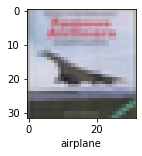

In [51]:
plot_sample(X_test,y_test,3)

In [50]:
classes[y_classes[3]]

'airplane'